# Yelp dataset Exploration
This notebook will explore the previously downloaded **Yelp** dataset available [here](https://www.yelp.com/dataset).<br>
The idea is to find a subset of the dataset that will work for analysis, than save that dataset as a separate set that is easily workable within the jupyter notebook environment.

In [43]:
# import packages
import pandas as pd
import numpy as np
import os
import re
import gzip

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# surpress warnings
import warnings
warnings.filterwarnings('ignore')

In [13]:
# set general data path
data_path="/Users/justinwilliams/Dropbox/data620/yelp_dataset"

In [14]:
# set data paths
data_business_path=os.path.join(data_path,'yelp_academic_dataset_business.json')
data_reviews_path=os.path.join(data_path,"yelp_academic_dataset_review.json")
data_user_path=os.path.join(data_path,"yelp_academic_dataset_user.json")

In [15]:
# import into pandas
df_business=pd.read_json(data_business_path, lines=True)
df_reviews=pd.read_json(data_reviews_path,lines=True)
df_user=pd.read_json(data_user_path,lines=True)

## Businesses
Let's first look at the `business` dataset to filter by `city`, `state` and `category`.

In [16]:
# column list
df_business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

In [17]:
# what states are in dataset
df_business['state'].value_counts()

PA     34039
FL     26330
TN     12056
IN     11247
MO     10913
LA      9924
AZ      9912
NJ      8536
NV      7715
AB      5573
CA      5203
ID      4467
DE      2265
IL      2145
TX         4
CO         3
WA         2
HI         2
MA         2
NC         1
UT         1
MT         1
MI         1
SD         1
XMS        1
VI         1
VT         1
Name: state, dtype: int64

Let's look at `Philadelphia,PA`.

In [18]:
# filter for philly
df_business_philly=df_business[(df_business['state'] == 'PA') & \
                               (df_business['city'] == 'Philadelphia')]

Let's look at categories within Philadelphia.

In [19]:
df_business_philly['categories'].value_counts()

Restaurants, Pizza                                                                                                          154
Pizza, Restaurants                                                                                                          124
Restaurants, Chinese                                                                                                         89
Nail Salons, Beauty & Spas                                                                                                   86
Chinese, Restaurants                                                                                                         84
                                                                                                                           ... 
Food, Japanese, Bubble Tea, Poke, Sushi Bars, Ramen, Restaurants                                                              1
Food, Sandwiches, Fast Food, Restaurants, Diners, Seafood, Street Vendors                               

Looks like `Restaurants, Pizza` is the highest, followed by `Pizza, Restaurant`.<br>
Let's use some regex to get anything that has `Restaurants` in the `categories` column.

In [20]:
# custom function
def has_restaurant(string):
    """
    Returns bool if match
    """
    if string and re.match('.*Restaurants.*', string):
        return True
    else:
        return False
    
# apply function to categories, create bool col
df_business_philly['has_restaurant'] = df_business_philly['categories'].apply(has_restaurant)

# filter
df_business_philly_rest=df_business_philly.loc[df_business_philly['has_restaurant']]\
    .reset_index(drop=True)


In [21]:
# preview
df_business_philly_rest.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,has_restaurant
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",True
1,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",True
2,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",True
3,QdN72BWoyFypdGJhhI5r7g,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,4.0,65,0,"{'Smoking': 'u'no'', 'NoiseLevel': 'u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ...",True
4,Mjboz24M9NlBeiOJKLEd_Q,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,3.0,41,0,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1...",True


In [22]:
df_business_philly_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5852 entries, 0 to 5851
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   business_id     5852 non-null   object 
 1   name            5852 non-null   object 
 2   address         5852 non-null   object 
 3   city            5852 non-null   object 
 4   state           5852 non-null   object 
 5   postal_code     5852 non-null   object 
 6   latitude        5852 non-null   float64
 7   longitude       5852 non-null   float64
 8   stars           5852 non-null   float64
 9   review_count    5852 non-null   int64  
 10  is_open         5852 non-null   int64  
 11  attributes      5799 non-null   object 
 12  categories      5852 non-null   object 
 13  hours           4854 non-null   object 
 14  has_restaurant  5852 non-null   bool   
dtypes: bool(1), float64(3), int64(2), object(9)
memory usage: 645.9+ KB


The `is_open` column is a int dtype. Let's look at value counts.

In [28]:
df_business_philly_rest['is_open'].value_counts()

1    3525
0    2327
Name: is_open, dtype: int64

Let's filter out the 0 which denote the restuarants have since been closed.

In [31]:
# filter out 0 in is_open column
df_business_philly_rest=df_business_philly_rest[df_business_philly_rest['is_open'] == 1]

In [32]:
df_business_philly_rest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3525 entries, 0 to 5851
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   business_id     3525 non-null   object 
 1   name            3525 non-null   object 
 2   address         3525 non-null   object 
 3   city            3525 non-null   object 
 4   state           3525 non-null   object 
 5   postal_code     3525 non-null   object 
 6   latitude        3525 non-null   float64
 7   longitude       3525 non-null   float64
 8   stars           3525 non-null   float64
 9   review_count    3525 non-null   int64  
 10  is_open         3525 non-null   int64  
 11  attributes      3486 non-null   object 
 12  categories      3525 non-null   object 
 13  hours           3049 non-null   object 
 14  has_restaurant  3525 non-null   bool   
 15  has_pizza       3525 non-null   bool   
dtypes: bool(2), float64(3), int64(2), object(9)
memory usage: 420.0+ KB


**5,525** rows is still quite a bunch, let's try and segment but food type within restaurants. Ideally would be ~1k rows or so. Reason is once we get to reviews the records balloon considerably.

### Pizza places in Philly
Let's see if we can narrow the restaurants down to pizza places in Philly.

In [33]:
def has_pizza(string):
    """
    Returns bool if match
    """
    if string and re.match('.*Pizza.*', string):
        return True
    else:
        return False
    
# apply function to categories, create bool col
df_business_philly_rest['has_pizza'] = df_business_philly_rest['categories'].apply(has_pizza)

# filter
df_business_philly_pizza=df_business_philly_rest.loc[df_business_philly_rest['has_pizza']]\
    .reset_index(drop=True)

In [34]:
df_business_philly_pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   business_id     529 non-null    object 
 1   name            529 non-null    object 
 2   address         529 non-null    object 
 3   city            529 non-null    object 
 4   state           529 non-null    object 
 5   postal_code     529 non-null    object 
 6   latitude        529 non-null    float64
 7   longitude       529 non-null    float64
 8   stars           529 non-null    float64
 9   review_count    529 non-null    int64  
 10  is_open         529 non-null    int64  
 11  attributes      522 non-null    object 
 12  categories      529 non-null    object 
 13  hours           432 non-null    object 
 14  has_restaurant  529 non-null    bool   
 15  has_pizza       529 non-null    bool   
dtypes: bool(2), float64(3), int64(2), object(9)
memory usage: 59.0+ KB


In [35]:
df_business_philly_pizza.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,has_restaurant,has_pizza
0,HuDNHqKv9n1mWpe4BqCnwA,Minas Pizza,6151 Ridge Ave,Philadelphia,PA,19128,40.035235,-75.216793,3.0,54,1,"{'BikeParking': 'False', 'Ambience': '{'romant...","Restaurants, Pizza","{'Monday': '0:0-0:0', 'Tuesday': '11:0-21:45',...",True,True
1,Pb5agnsD9EdCl6yuZp2jJA,O Sole Mio,250 Catharine St,Philadelphia,PA,19147,39.937829,-75.148263,4.5,85,1,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","Food, Seafood, Sardinian, Gelato, Restaurants,...","{'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...",True,True
2,cLlBDZxYJ1dt1JgMuZnXew,Olly,700 S 5th St,Philadelphia,PA,19147,39.940878,-75.151106,4.0,51,1,"{'BusinessAcceptsCreditCards': 'True', 'Outdoo...","Pizza, Food, Bagels, Sandwiches, Comfort Food,...","{'Monday': '0:0-0:0', 'Wednesday': '16:0-21:0'...",True,True
3,bKppmYKQ_-9cpp2yziB-Qw,Lincoln Chicken Pizza And Grill,2614 W Girard Ave,Philadelphia,PA,19130,39.973875,-75.179424,2.5,20,1,"{'Ambience': '{'romantic': False, 'intimate': ...","Cheesesteaks, Chicken Wings, Restaurants, Pizza","{'Monday': '11:0-0:0', 'Tuesday': '11:0-0:0', ...",True,True
4,o4_cgIKWgvJ09TZeSzARmg,Quality Pizza,6438 Rising Sun Ave,Philadelphia,PA,19111,40.050921,-75.094581,3.0,19,1,"{'OutdoorSeating': 'False', 'RestaurantsTakeOu...","Restaurants, Pizza",None,True,True


Ok, now we have all the rows with that have `Pizza` in the `categories` column.<br>
Let's filter the other datasets by the `business_id` column.

## Reviews
Let's take a look at the reviews dataset.

In [92]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 480.0+ MB


In [82]:
# columns
df_reviews.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

Ok, there is a `business_id` column, we need to filter all the rows in `df_reviews` by the business id from `df_business_philly_pizza`

In [36]:
# merge df and create indicator column
merged_df = df_business_philly_pizza.merge(df_reviews, on='business_id', 
                                          how='left', indicator=True)


Filter by columns in `df_review`.

In [37]:
df_reviews_philly_pizza=merged_df[merged_df.columns[merged_df.columns.isin(df_reviews.columns)]]

In [39]:
df_reviews_philly_pizza.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50760 entries, 0 to 50759
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   business_id  50760 non-null  object        
 1   review_id    50760 non-null  object        
 2   user_id      50760 non-null  object        
 3   useful       50760 non-null  int64         
 4   funny        50760 non-null  int64         
 5   cool         50760 non-null  int64         
 6   text         50760 non-null  object        
 7   date         50760 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 3.5+ MB


In [40]:
df_reviews_philly_pizza.head()

,business_id,review_id,user_id,useful,funny,cool,text,date
0,HuDNHqKv9n1mWpe4BqCnwA,ihWWn8QcIm0WH4VnXnqY3Q,fg3ed8OnD28mT_Zx7K8wlA,0,0,0,Let me tell you mina's is the place i always g...,2017-05-13 10:08:43
1,HuDNHqKv9n1mWpe4BqCnwA,-0PWvSBx58D2EEXrcbZ5wg,h2LtQ1s5X20d0yrdqUMJ0Q,0,1,0,That dough!!! PHENOMENAL!!!! Veal stromboli?...,2014-10-13 16:16:27
2,HuDNHqKv9n1mWpe4BqCnwA,1KW2iQW8yCN8iPrs4LbACQ,Od2Ev0b92eKrciDJIRVNpQ,2,0,0,In my quest to find the best pizza in Roxborou...,2013-05-14 12:30:35
3,HuDNHqKv9n1mWpe4BqCnwA,egGteVOJdK7UMvNqvaRA9A,uBowLGrAIif1DvWLMDCD2g,1,0,0,We love their pizza.. it's crispy and not grea...,2015-01-10 18:13:22
4,HuDNHqKv9n1mWpe4BqCnwA,azkw15ZxXdi-xKu4YiRxLQ,LvJaWVpuGvladxwgi0UoWA,0,0,0,Just started checking this place out. The food...,2012-04-08 13:46:59


Let's see how far back in time these reviews go.

In [41]:
min(df_reviews_philly_pizza['date'])

Timestamp('2005-08-18 17:15:34')

Ok, reviews go as far back as 2005, let's see if we can get a distribution of reviews per year for the Pizza places in Philadelphia.

In [42]:
# create a year column
df_reviews_philly_pizza['year']=df_reviews_philly_pizza['date'].dt.year

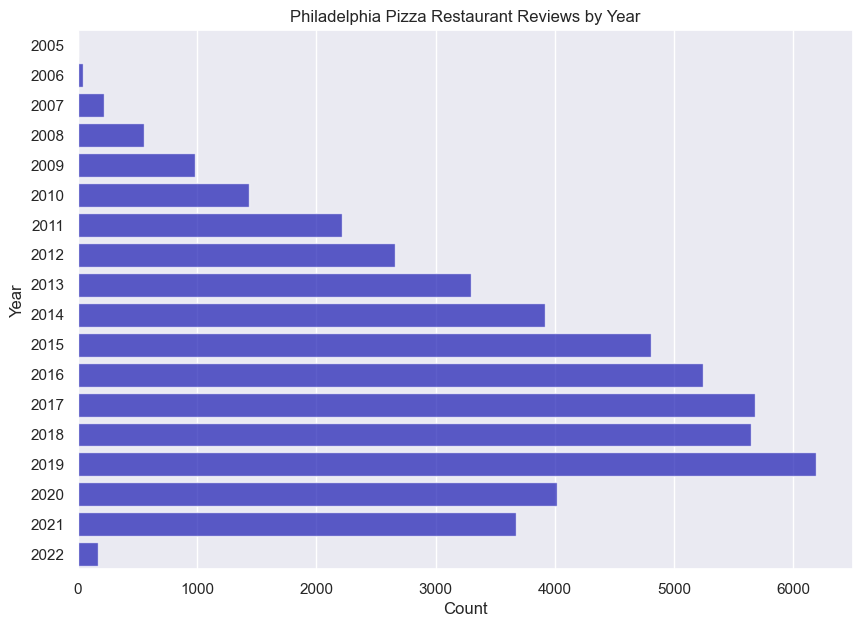

In [82]:
# plot frequency by year
plt.figure(figsize=(10,7))
sns.set_theme('notebook', 'darkgrid')
sns.countplot(y='year',data=df_reviews_philly_pizza, color="MediumBlue", alpha=0.7)
plt.ylabel("Year")
plt.xlabel("Count")
plt.title("Philadelphia Pizza Restaurant Reviews by Year")
plt.show()

## Users
Let's look at the users dataset

In [101]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


Let's look at the columns.

In [83]:
df_user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

Ok, we can filer on `user_id`, which won't necessarly give us ONLY reviews for restaurants in Phildelphia, but could give us additional info on the users.

In [83]:
# merge df and create indicator column
merged_df2 = df_reviews_philly_pizza.merge(df_user, on='user_id', 
                                          how='left', indicator=True)

In [84]:
df_user_filtered=merged_df2[merged_df2.columns[merged_df2.columns.isin(df_user.columns)]]

In [85]:
df_user_filtered.head()

,user_id,name,review_count,yelping_since,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,fg3ed8OnD28mT_Zx7K8wlA,Ashton,11,2017-04-16 23:59:40,,None,0,4.18,0,0,0,0,0,0,0,0,0,0,0
1,h2LtQ1s5X20d0yrdqUMJ0Q,Christopher,1728,2010-03-23 17:13:25,"2010,2011,2012,2013,2014,2015,2016,2017,2018,2...","arpUY2-cgsTq2QufV1Ij_g, WCLcAsRhp8dfdsZU_p_msA...",165,3.36,70,12,10,3,2,62,157,177,177,129,27
2,Od2Ev0b92eKrciDJIRVNpQ,Matt,552,2010-02-19 04:39:38,"2013,2014,2015,2016,2017,2018,2019,20,20,2021","goQo1w4iozF4WoalvQV9iA, _YuTCRA6fH753tQaVGXlBg...",21,3.86,6,3,2,0,0,15,14,8,8,11,3
3,uBowLGrAIif1DvWLMDCD2g,Gina,43,2011-04-21 19:39:36,,"OI3dy9QK6NE2KOs0RAP3JQ, vho3rur8sdVMJwpWpKFakg...",2,4.26,1,0,0,1,0,1,2,0,0,0,0
4,LvJaWVpuGvladxwgi0UoWA,Liam,23,2011-11-14 22:41:45,,"6SEZ3ePgtGkiAnhYJvUJyw, rWq3jPXb-3nALFk_xtGE2A...",0,2.68,0,0,0,0,0,1,0,0,0,0,0


In [86]:
df_user_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50760 entries, 0 to 50759
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             50760 non-null  object 
 1   name                50760 non-null  object 
 2   review_count        50760 non-null  int64  
 3   yelping_since       50760 non-null  object 
 4   elite               50760 non-null  object 
 5   friends             50760 non-null  object 
 6   fans                50760 non-null  int64  
 7   average_stars       50760 non-null  float64
 8   compliment_hot      50760 non-null  int64  
 9   compliment_more     50760 non-null  int64  
 10  compliment_profile  50760 non-null  int64  
 11  compliment_cute     50760 non-null  int64  
 12  compliment_list     50760 non-null  int64  
 13  compliment_note     50760 non-null  int64  
 14  compliment_plain    50760 non-null  int64  
 15  compliment_cool     50760 non-null  int64  
 16  comp

## Pickle results
Ok, now that we have manageable filtered dataset:
- Philadelphia restaurant businesses
- Reviews of those restaurants
- Profiles of those reviewers

We can pickle the df and analyze further in another notebook.<br>
We will have to compress the dataframes due to size limitations of pushing to github.

In [87]:
# create dataframe list
dfs=[df_business_philly_pizza,df_reviews_philly_pizza,df_user_filtered]

# df names list
df_names=['df_business_philly_pizza','df_reviews_philly_pizza','df_user_filtered_pizza']

In [89]:
# Compress the DataFrame using gzip and pickle it
for df, name in zip(dfs,df_names):
  # with gzip.open(os.path.join('./data',name + '.pkl.gz'), 'wb') as f:
  #     pd.to_pickle(df, f)
  with open(os.path.join('./data', name + '.pkl'), 'wb') as f:
    pd.to_pickle(df,f)